## Well-defined Gaussian sampling for variance models

Our variance models are calculated with a Monte-Carlo approach, drawing N samples from a Gaussian distribution. This is inherently noisy, so there is noise in the resulting models. 

An alternative approach would be to select N samples, following a Gaussian distribution, but with well-determined spacing rather than randomly.

This removes the randomness from the model, while retaining the Gaussian distribution.

### Import modules

In [24]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from scipy.stats import norm #normal distribution

### Plot the Gaussian probability density function and cumulative distribution function

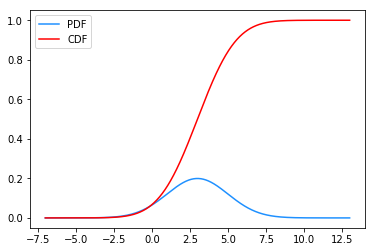

In [25]:
mean=3
sigma=2

fig=pl.figure(facecolor="w")

# x values, purely for plotting purposes:
lowerlim=mean-5*sigma
upperlim=mean+5*sigma
plot_xvals=np.linspace(lowerlim,upperlim,1000)

# Probablity 
pl.plot(xvals,norm.pdf(plot_xvals,mean,sigma),label="PDF",color="dodgerblue")

# Cumulative probability
pl.plot(xvals,norm.cdf(plot_xvals,mean,sigma),label="CDF",color="r")

pl.legend()

pl.show()

### Find N evenly spaced points in the cumulative probability

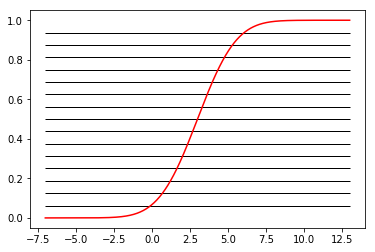

In [26]:

N=15

cumulative_vals=np.linspace(0,1,N+2)[1:-1] # Cut off zero and 1, we don't want those

fig=pl.figure(facecolor="w")
pl.plot(plot_xvals,norm.cdf(plot_xvals,mean,sigma),color="r")
pl.hlines(cumulative_vals,lowerlim,upperlim,lw=1)
pl.show()

### Find the corresponding x values:
These values will follow a Gaussian distribution, but are not random

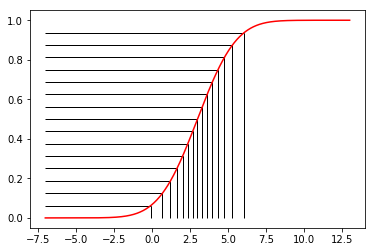

In [30]:
# Define a spline to return x as a function of CDF value
# There is probably a smart way of doing this, but I love splines
from scipy.interpolate import UnivariateSpline as spl

# Swap x and y values as spline input, gives a fast way of inverting any function
inverse_cdf=spl(norm.cdf(xvals,mean,sigma),xvals,s=0)

# For each of our N cumulative probabilities, find the corresponding x value
sample_xvals=inverse_cdf(cumulative_vals)

fig=pl.figure(facecolor="w")
pl.plot(plot_xvals,norm.cdf(plot_xvals,mean,sigma),color="r")
pl.hlines(cumulative_vals,lowerlim,sample_xvals,lw=1)
pl.vlines(sample_xvals,0,cumulative_vals,lw=1)
pl.show()


### Test this, with a larger N, to check we can recover a Gaussian:

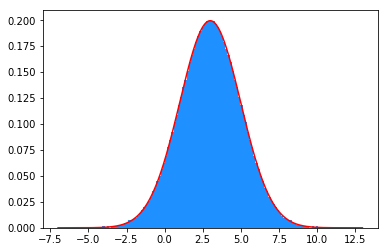

In [42]:
N_test=5000
test_cumulative_vals=np.linspace(0,1,N_test+2)[1:-1]
test_xvals=inverse_cdf(test_cumulative_vals)

fig=pl.figure(facecolor="w")
# Plot a density histogram of these values:
pl.hist(test_xvals,bins=100,density=True,color="dodgerblue")
# Plot the PDF for comparison:
pl.plot(xvals,norm.pdf(plot_xvals,mean,sigma),color="r")
pl.show()